In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src.data_loader import load_dataframe

In [2]:
attributes = ['danceability', 'energy', 'speechiness', 'valence', 'tempo']
n_att = len(attributes)
rc_count = int(np.ceil(np.sqrt(n_att)))
genres = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

In [3]:
df = load_dataframe()
df = df.drop(columns=['is_hit'])

In [4]:
df.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,speechiness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,0.0583,0.518,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,0.0373,0.693,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,0.0742,0.613,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,0.1020,0.277,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,0.0359,0.725,123.976


In [5]:
df.corr(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
track_popularity,1.000000,0.046574,-0.103511,0.005440,0.022594,0.004322
danceability,0.046574,1.000000,-0.081427,0.183558,0.333751,-0.184640
energy,-0.103511,-0.081427,1.000000,-0.029030,0.149662,0.151658
speechiness,0.005440,0.183558,-0.029030,1.000000,0.064824,0.032755
valence,0.022594,0.333751,0.149662,0.064824,1.000000,-0.025046
tempo,0.004322,-0.184640,0.151658,0.032755,-0.025046,1.000000


In [6]:
df[df['playlist_genre'] == 'rap'].corr(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
track_popularity,1.000000,0.134635,-0.120532,-0.078645,-0.027399,0.049321
danceability,0.134635,1.000000,-0.146614,0.017634,0.254167,-0.097734
energy,-0.120532,-0.146614,1.000000,0.063230,0.203030,0.092022
speechiness,-0.078645,0.017634,0.063230,1.000000,0.171212,0.017155
valence,-0.027399,0.254167,0.203030,0.171212,1.000000,-0.017284
tempo,0.049321,-0.097734,0.092022,0.017155,-0.017284,1.000000


<Axes: xlabel='playlist_genre', ylabel='track_popularity'>

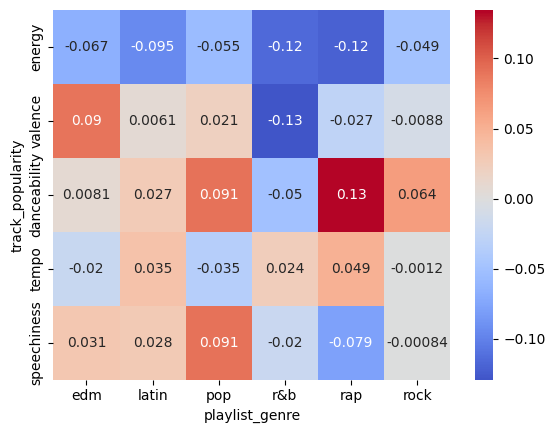

In [7]:
genre_corrs = (
    df.groupby("playlist_genre")[["energy", "valence", "danceability", "tempo", "speechiness"] + ["track_popularity"]]
      .apply(lambda g: g.corr(numeric_only=True)["track_popularity"]
             .drop("track_popularity"))
)[["energy", "valence", "danceability", "tempo", "speechiness"]]

sns.heatmap(genre_corrs.T, annot=True, center=0, cmap="coolwarm")

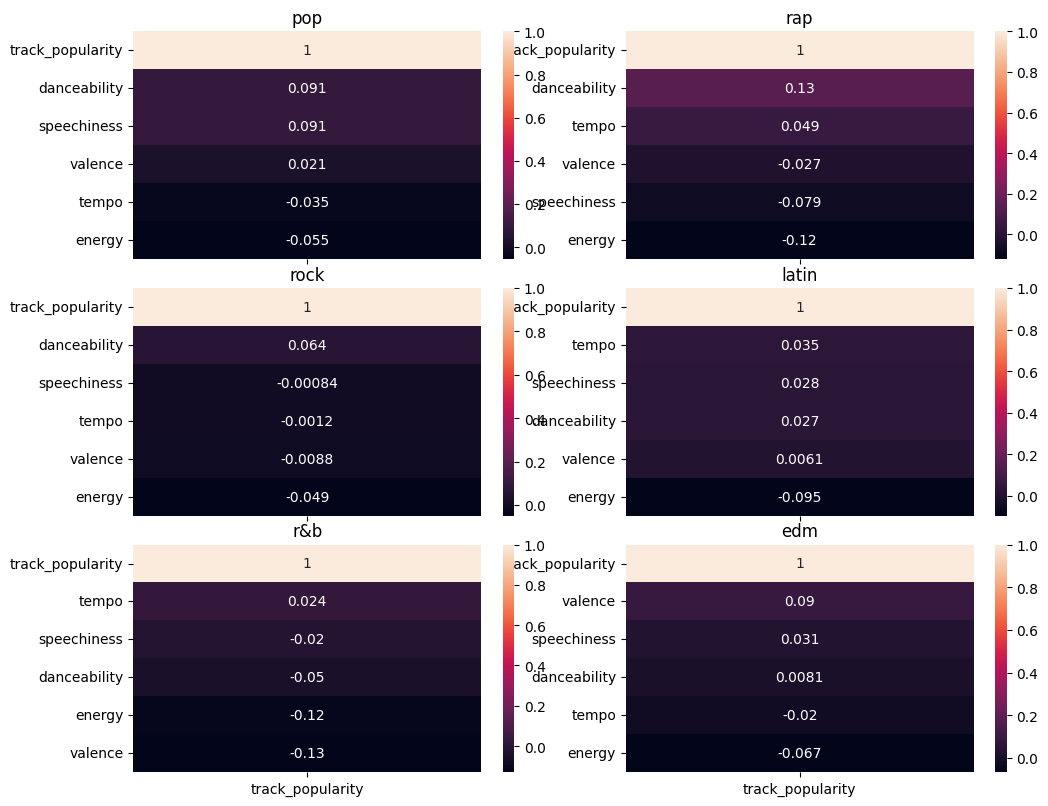

In [8]:
f, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True)

f.tight_layout()

for i, genre in enumerate(genres):
    corr = df[df['playlist_genre'] == genre].corr(numeric_only=True)
    sns.heatmap(corr[['track_popularity']].sort_values(by='track_popularity', ascending=False), annot=True, ax=ax.flat[i])
    ax.flat[i].set_title(genre)

Acousticness probably doesnt matter since its only a confidence value of whether a song is acoustic or not and not "how acoustic" a song is

Rap: 
- Higher danceability leads to higher popularity
- Lower energy leads to higher popularity

R&B:
- Lower energy leads to higher popularity
- Lower valence leads to higher popularity

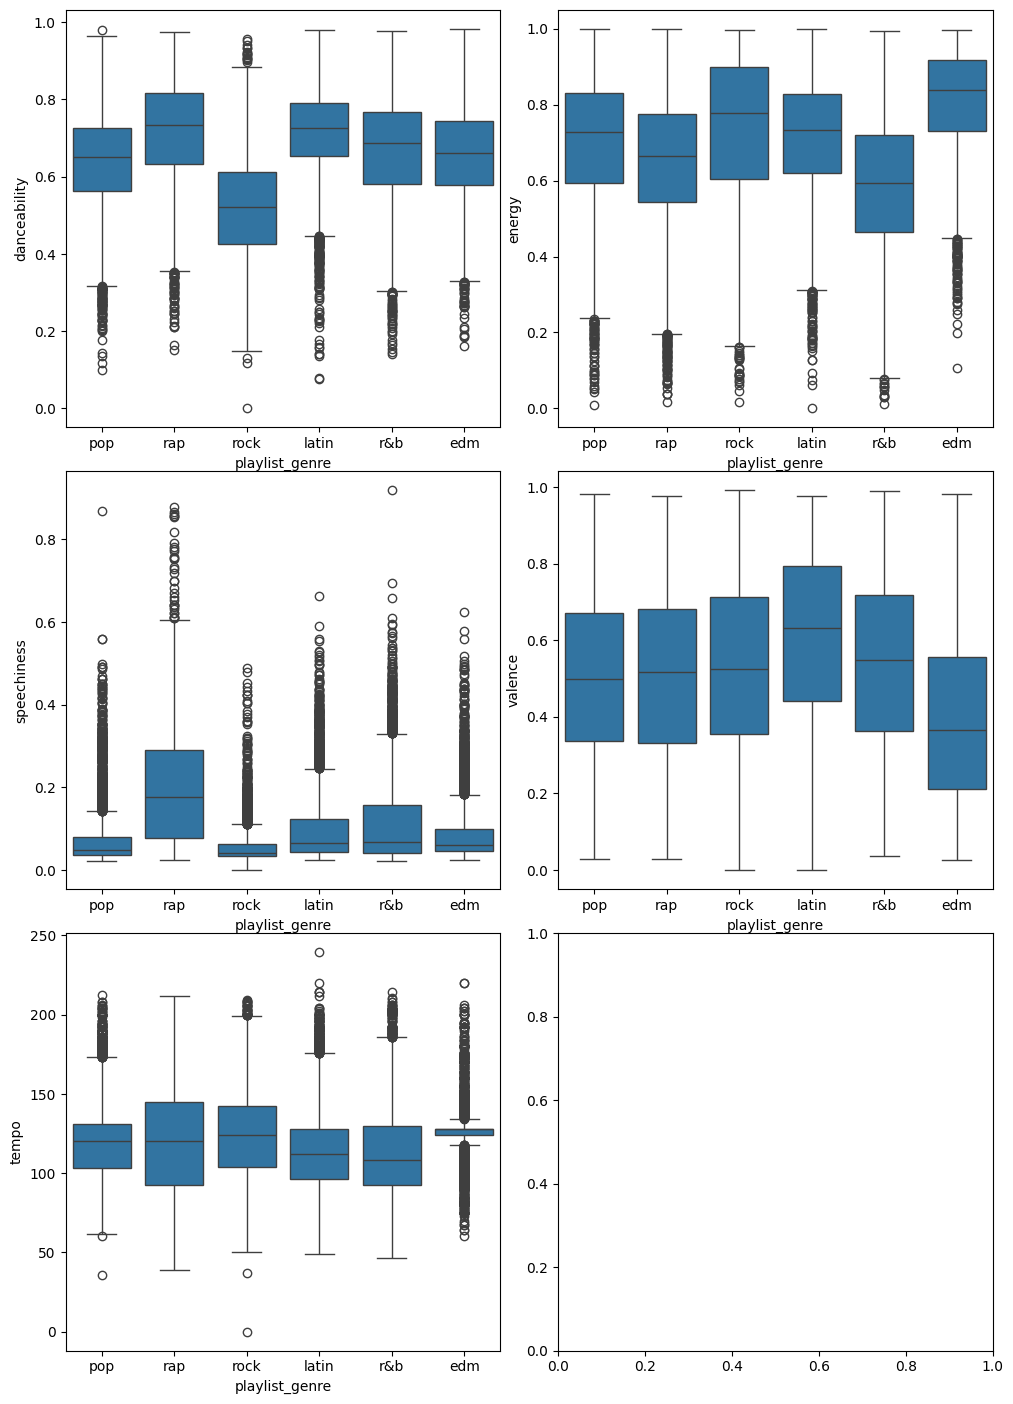

In [9]:
f, ax = plt.subplots(3, 2, figsize=(10, 14))

f.tight_layout()

for i, attr in enumerate(attributes):
    sns.boxplot(data=df, ax=ax.flat[i], x="playlist_genre", y=attr)
    

Pop: 
- Doesnt stand out

Rap: 
- Highest danceability
- Lower energy than most
- Highest speechiness
- Most varied tempo

Rock:
- Lowest danceability by far
- High energy
- Generally low speechiness

Latin:
- High danceability
- Highest valence -> Feel good music

R&B:
- Lowest energy
- Pretty varied speechiness

EDM:
- Highest energy
- Lowest valence -> ???

In [10]:
df.groupby('playlist_genre').mean(numeric_only=True)

,track_popularity,danceability,energy,speechiness,valence,tempo
playlist_genre,,,,,,
edm,30.678286,0.657639,0.809604,0.087940,0.397491,126.328088
latin,41.449710,0.711021,0.710417,0.100461,0.607361,118.527793
pop,45.905300,0.637698,0.701031,0.074161,0.502176,120.962740
r&b,35.929396,0.667475,0.588932,0.115526,0.537936,113.916866
rap,41.846054,0.716045,0.649767,0.197394,0.505213,120.584885
rock,39.694309,0.518519,0.733067,0.057944,0.532560,125.039452


In [11]:
df["pop_bin"] = pd.cut(df["track_popularity"], bins=[0, 30, 60, 100], labels=["Low", "Medium", "High"])

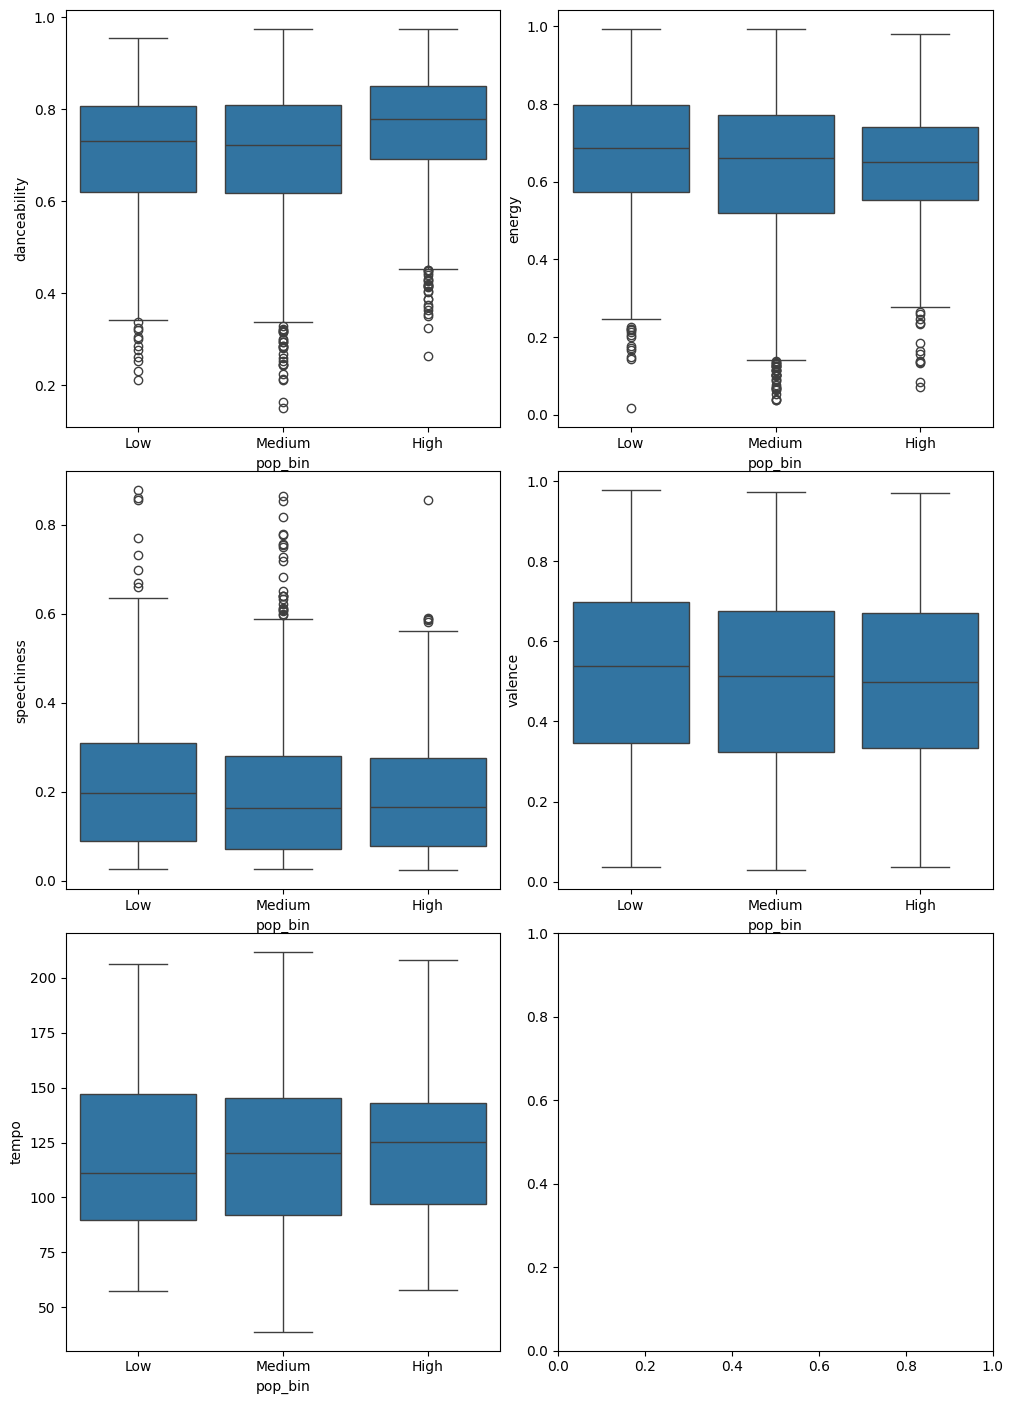

In [12]:
f, ax = plt.subplots(3, 2, figsize=(10, 14))

f.tight_layout()

for i, attr in enumerate(attributes):
    sns.boxplot(data=df[df['playlist_genre']=='rap'], ax=ax.flat[i], x="pop_bin", y=attr)

Rap: Does low energy lead to high danceability?

R&B: Does low valence lead to low energy?

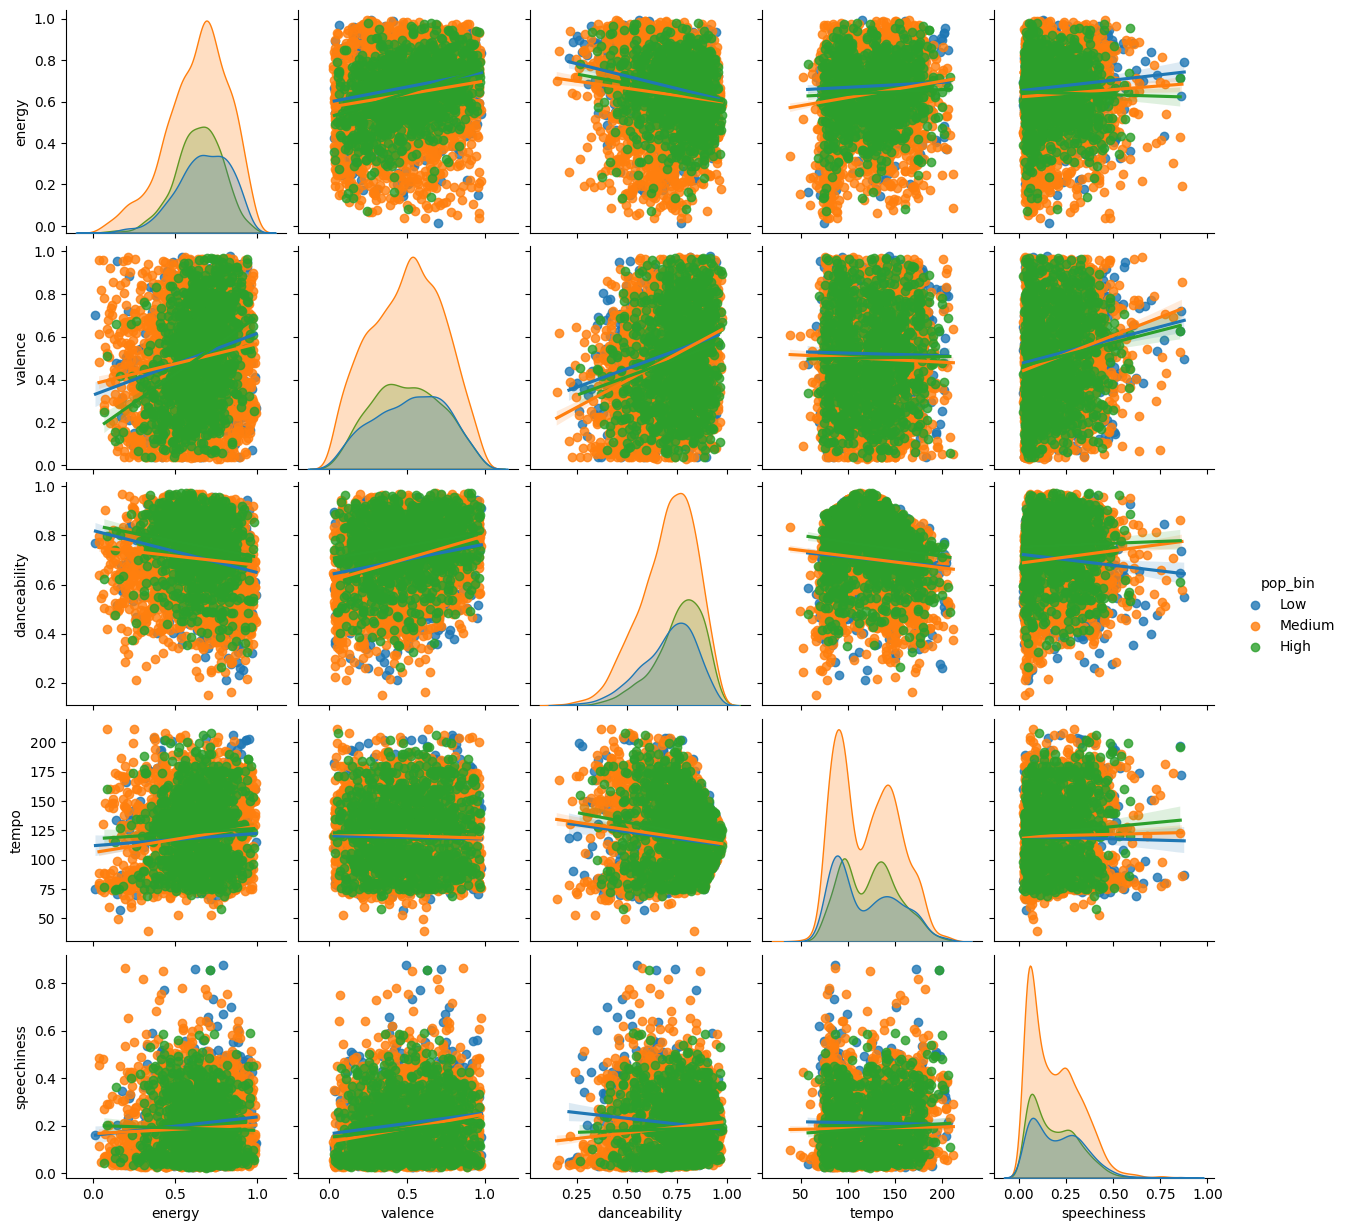

In [13]:
sns.pairplot(df[(df["playlist_genre"] == "rap")], 
             vars=["energy", "valence", "danceability", "tempo", "speechiness"],
             hue="pop_bin",
             kind='reg')


Only small relation between lower energy and higher danceability

Sweetspots:
- 0.4 to 0.8 energy
- 0.6 to 1.0 danceability

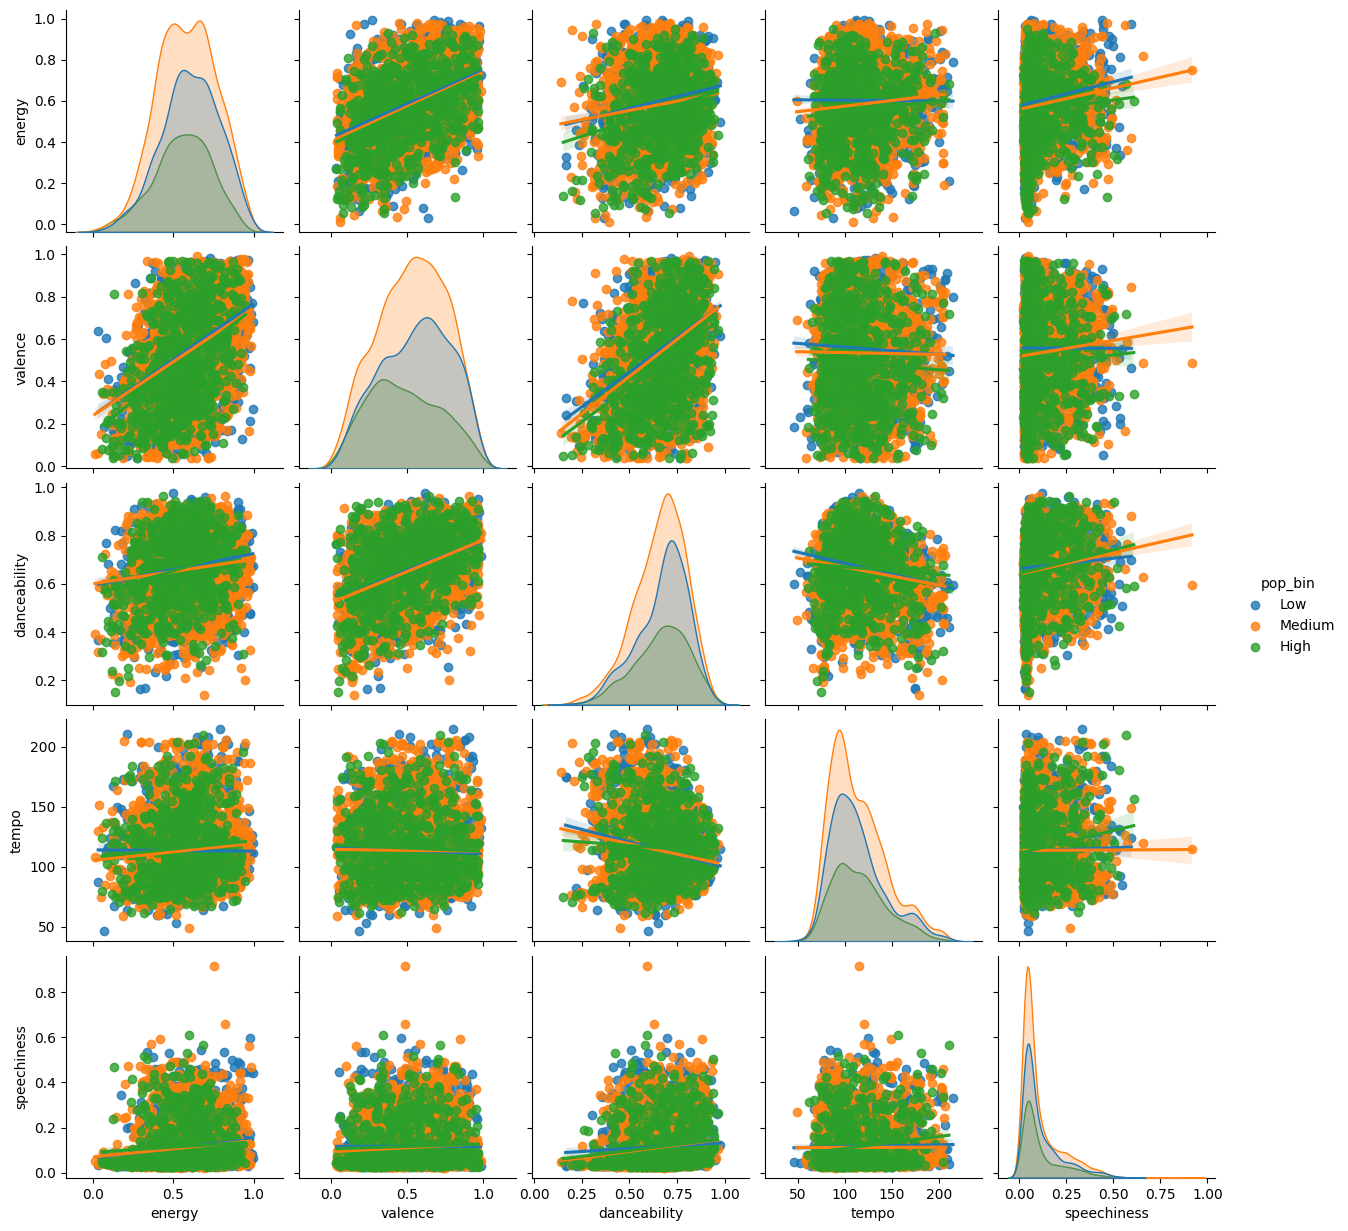

In [14]:
sns.pairplot(df[(df["playlist_genre"] == "r&b")], 
             vars=["energy", "valence", "danceability", "tempo", "speechiness"],
             hue="pop_bin",
             kind='reg')

R&B songs with lower valence are more popular

Low valence generally means lower energy in R&B songs

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

genre_df = df[(df['playlist_genre']=='latin') & (df['track_popularity'] > 0)]

X = genre_df[["energy", "valence", "danceability", "tempo", "speechiness"]]
y = genre_df["track_popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

print(r2)

-0.05020532330525351


<Axes: xlabel='track_popularity', ylabel='Count'>

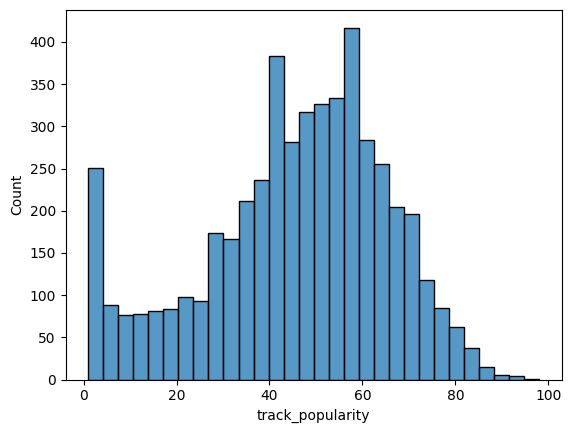

In [16]:
sns.histplot(y, bins=30)

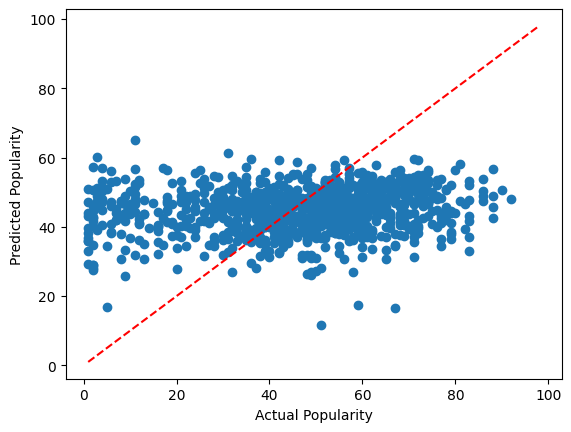

In [17]:
f, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel("Actual Popularity")
ax.set_ylabel("Predicted Popularity")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # identity line

In [18]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_scaled, y_train)
y_dummy = dummy.predict(X_test_scaled)
print(r2_score(y_test, y_dummy))


-0.004143698995885847


              precision    recall  f1-score   support

        High       0.33      0.14      0.20       233
         Low       0.25      0.08      0.12       205
      Medium       0.58      0.86      0.69       555

    accuracy                           0.53       993
   macro avg       0.39      0.36      0.34       993
weighted avg       0.45      0.53      0.46       993



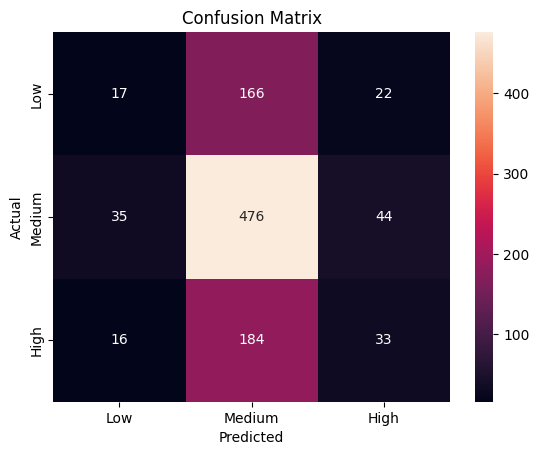

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

y = genre_df["pop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Optional: visualize confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#from sklearn.inspection import partial_dependence, PartialDependenceDisplay

#f, ax = plt.subplots(3, 2, figsize=(10, 12))

#f.tight_layout()
#features = ["tempo", "energy", "danceability", "speechiness", "valence"]

#for i in range(len(features)):
#    PartialDependenceDisplay.from_estimator(rf, X_scaled, [(i)], feature_names=features, ax=ax.flat[i])

In [21]:
#PartialDependenceDisplay.from_estimator(rf, X_scaled, [(2, 1)], feature_names=features)

In [22]:
# I only later realized that the model is not performing well so there is no point in calculating shap values

#import shap

#explainer = shap.TreeExplainer(rf)
#shap_values = explainer.shap_values(X_scaled)


In [23]:
#shap.summary_plot(shap_values, X_scaled, feature_names=features)

In [24]:
#shap.dependence_plot("danceability", shap_values, X_scaled, feature_names=features)

In [25]:
#shap.dependence_plot("energy", shap_values, X_scaled, feature_names=features)